<a href="https://colab.research.google.com/github/solanki13/Credit-Card-Prediction/blob/main/Viva_Credit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
#### Can we accurately predict whether a credit card user will default on their payment next month, based on their previous billing, payment behavior, and demographic information?

### 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer

### 2.Upload and read data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving viva_credit.csv to viva_credit.csv


In [3]:
df = pd.read_csv('viva_credit.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.drop('ID', axis=1, inplace=True)

In [6]:
print(df['default.payment.next.month'].value_counts(normalize=True))

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [7]:
df.rename(columns={"default.payment.next.month": "target"}, inplace=True)

In [8]:
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})

### 3.Visualization

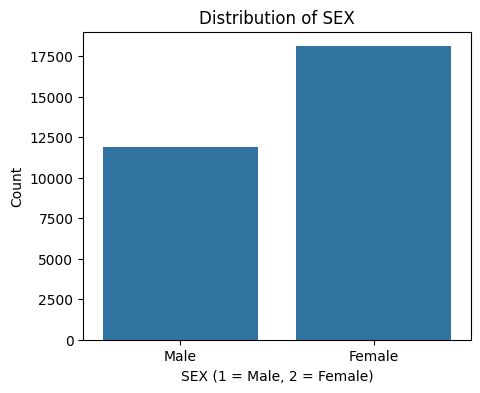

In [9]:
plt.figure(figsize=(5, 4))
sns.countplot(x="SEX", data=df)
plt.title("Distribution of SEX")
plt.xlabel("SEX (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

#### There are more females than males in the dataset. This indicates a gender imbalance that should be accounted for during analysis or modeling (e.g., through stratified sampling).

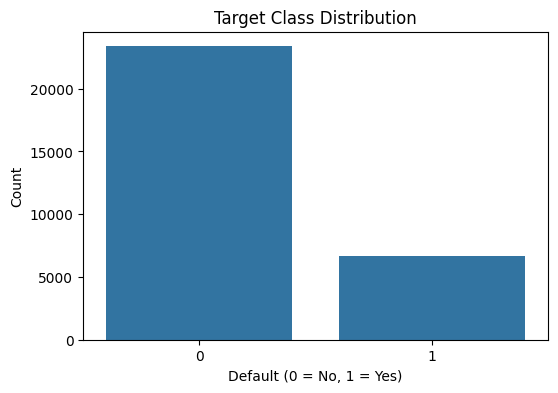

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#### The dataset is highly imbalanced, with significantly more people who did not default on payments (class 0). This suggests a potential class imbalance problem, which may require techniques like oversampling, undersampling, or class weighting during modeling.

<Axes: xlabel='EDUCATION', ylabel='count'>

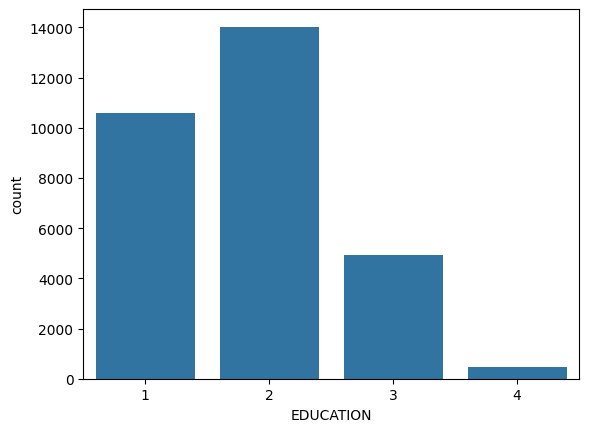

In [11]:
sns.countplot(x="EDUCATION", data=df)

#### Most individuals fall under education levels 1 and 2, with level 2 being the highest. Education level 4 has a very small representation, which might be grouped or dropped if it's not significant for modeling.

<Axes: xlabel='MARRIAGE', ylabel='count'>

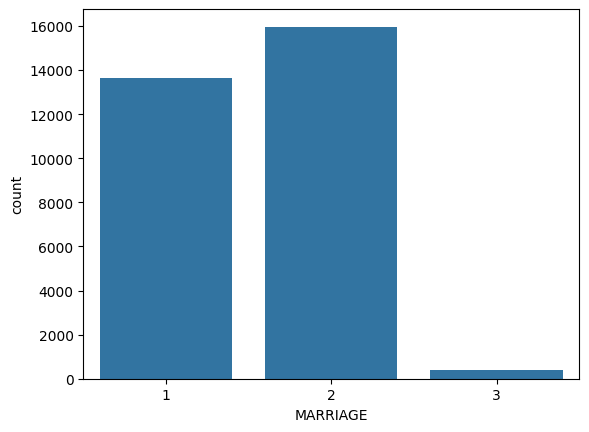

In [12]:
sns.countplot(x="MARRIAGE", data=df)

#### The majority of individuals are either married (2) or single (1), while very few fall into category 3. The duplication indicates possibly redundant visualization, and category 3 might need clarification or merging if it’s not well defined.

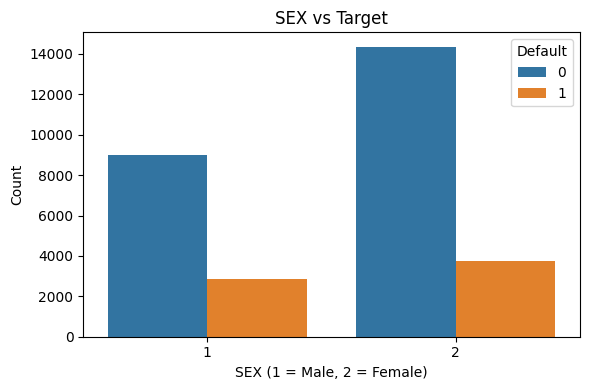

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', hue='target', data=df)
plt.title("SEX vs Target")
plt.xlabel("SEX (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.legend(title="Default")
plt.tight_layout()
plt.show()



*   Both males (1) and females (2) have more people who did not default (class 0).




*   However, female defaulters slightly outnumber male defaulters, despite fewer males in the dataset overall (as seen in earlier plots).

*  This suggests females might have a slightly higher default rate than males, which could be worth exploring further with percentages or statistical testing.






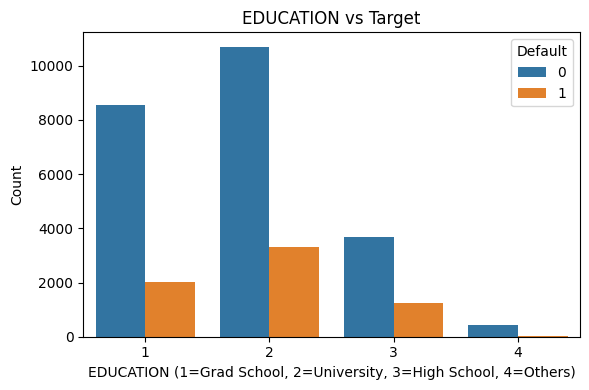

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='EDUCATION', hue='target', data=df)
plt.title("EDUCATION vs Target")
plt.xlabel("EDUCATION (1=Grad School, 2=University, 3=High School, 4=Others)")
plt.ylabel("Count")
plt.legend(title="Default")
plt.tight_layout()
plt.show()




*   Defaulting occurs across all education levels, but the largest count of defaulters is among those with University education (2) and Graduate School (1).





*   Education level 3 (High School) shows a smaller total population and also fewer defaults.
*  The very low count in Education level 4 (Others) makes it statistically insignificant — might be grouped or excluded in modeling.






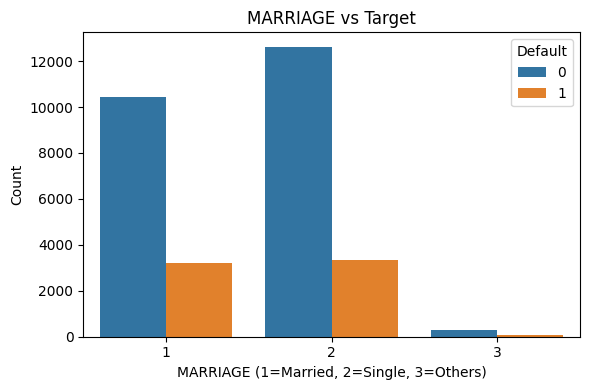

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='MARRIAGE', hue='target', data=df)
plt.title("MARRIAGE vs Target")
plt.xlabel("MARRIAGE (1=Married, 2=Single, 3=Others)")
plt.ylabel("Count")
plt.legend(title="Default")
plt.tight_layout()
plt.show()




*   Both married (1) and single (2) individuals show similar levels of default, even though singles are more in number.




*   Category 3 (Others) again has negligible data — this could be noise or poorly defined, and may need cleaning or exclusion.
*  There is no strong difference between married and single individuals in terms of default behavior based on count alone — further analysis with ratios or statistical tests can help clarify.





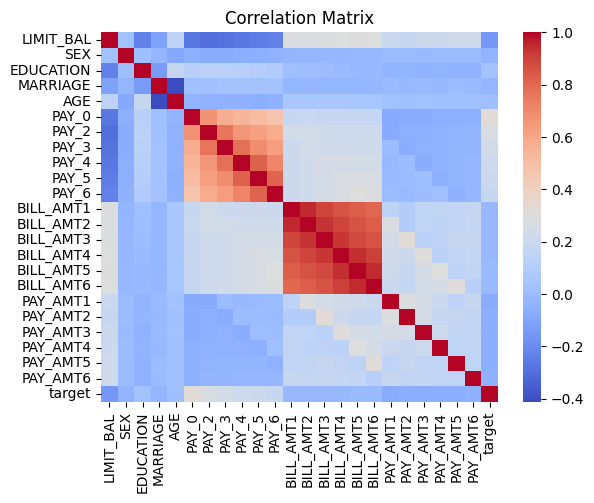

In [16]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()




*   Target variable has moderate positive correlation with PAY_0, PAY_2, ..., PAY_6 (payment delay indicators).

    ⟶ This means payment delays are good predictors of default.







*   BILL_AMT and PAY_AMT features are highly correlated with themselves across months, indicating consistent billing and payment patterns over time.
*  LIMIT_BAL shows weak correlation with the target, suggesting credit limit alone isn't a strong default indicator.


*   Most demographic features like SEX, EDUCATION, and MARRIAGE show very low correlation with the target.



In [17]:
bill_amt_cols = [col for col in df.columns if 'BILL_AMT' in col]
pay_amt_cols = [col for col in df.columns if 'PAY_AMT' in col]


In [18]:
bill_means = df.groupby("target")[bill_amt_cols].mean().T
pay_means = df.groupby("target")[pay_amt_cols].mean().T

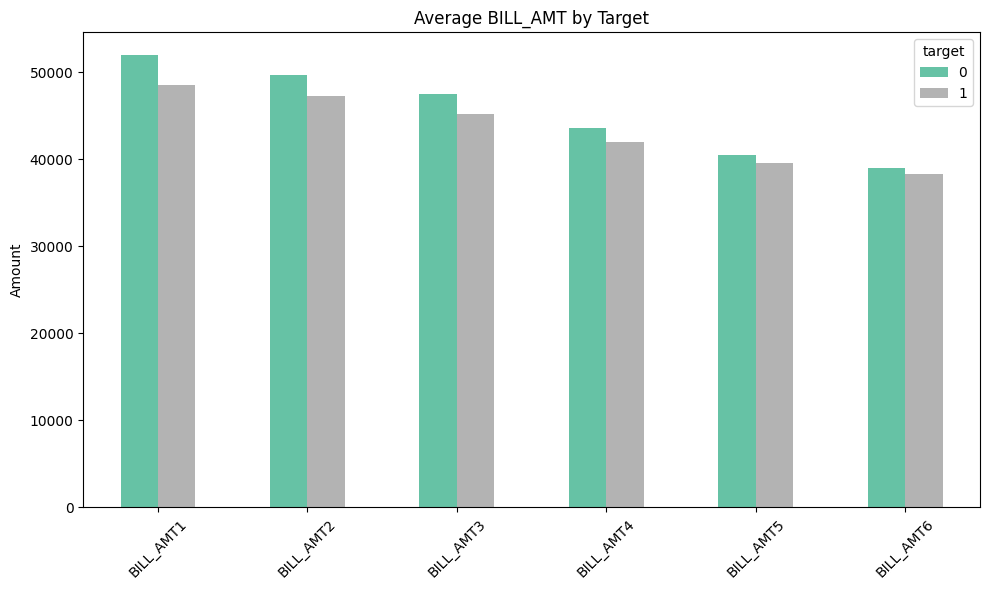

In [19]:
bill_means.plot(kind='bar', figsize=(10, 6), title='Average BILL_AMT by Target', colormap="Set2")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Across all six months, defaulters (target = 1) consistently have lower average bill amounts than non-defaulters.
*   This suggests that:

    -Defaulters tend to carry lower credit card balances than those who pay on time.

    -It might indicate lower usage or lower credit limits among defaulters.

*   However, the difference is not very large, so while it contributes to prediction, it's less impactful than repayment behavior (as seen in correlation with PAY_X features).





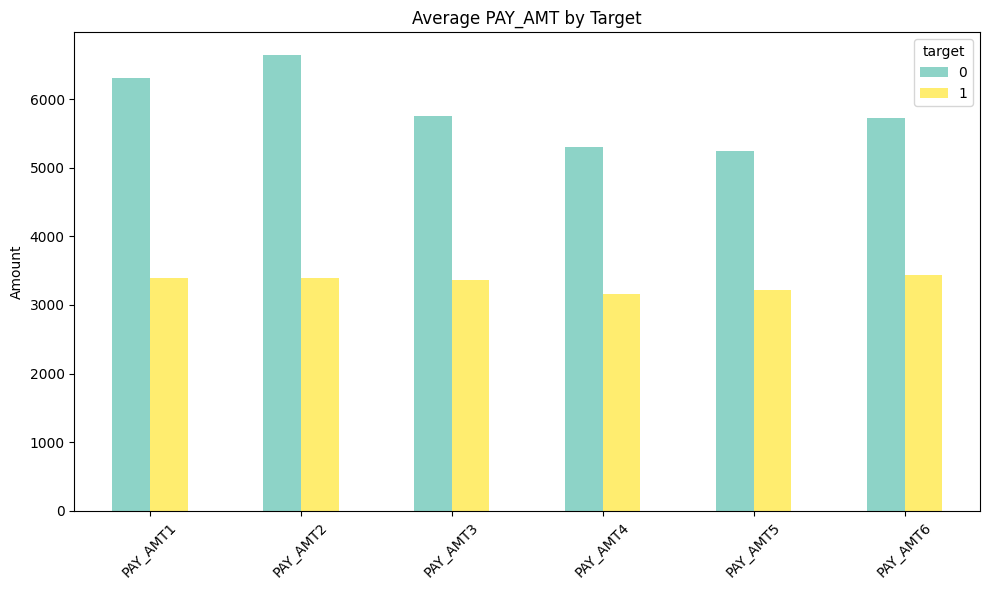

In [20]:
pay_means.plot(kind='bar', figsize=(10, 6), title='Average PAY_AMT by Target', colormap="Set3")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Across all six payment months (PAY_AMT1 to PAY_AMT6), individuals with target = 0 (likely non-defaulters) consistently paid higher average amounts than those with target = 1 (likely defaulters).





*   Interpretation: Non-defaulters tend to pay more regularly or in larger amounts, indicating more responsible financial behavior.
*  Actionable Use: These features (PAY_AMT1-6) could be important predictors for credit risk models.





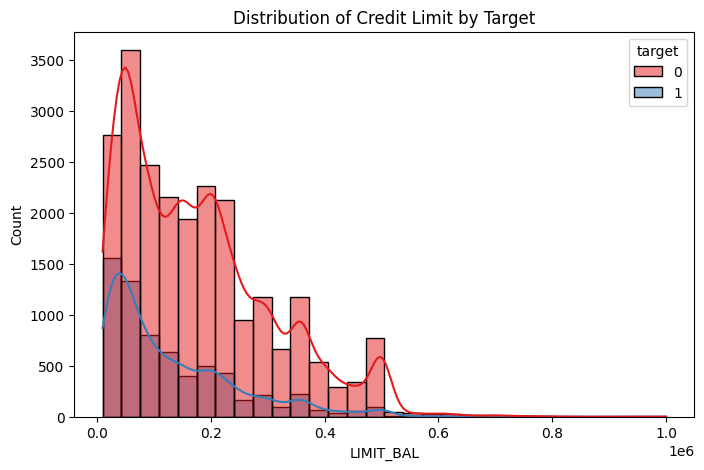

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='LIMIT_BAL', hue='target', bins=30, kde=True, palette='Set1')
plt.title("Distribution of Credit Limit by Target")
plt.xlabel("LIMIT_BAL")
plt.ylabel("Count")
plt.show()




*   People with target = 0 (non-defaulters) tend to have higher credit limits.






*   People with target = 1 (defaulters) are more concentrated in the lower credit limit ranges.
*   Interpretation: Higher credit limits may correlate with better creditworthiness and lower risk of default.


*   Actionable Use: LIMIT_BAL is a strong discriminating variable and should be included in risk assessment models.



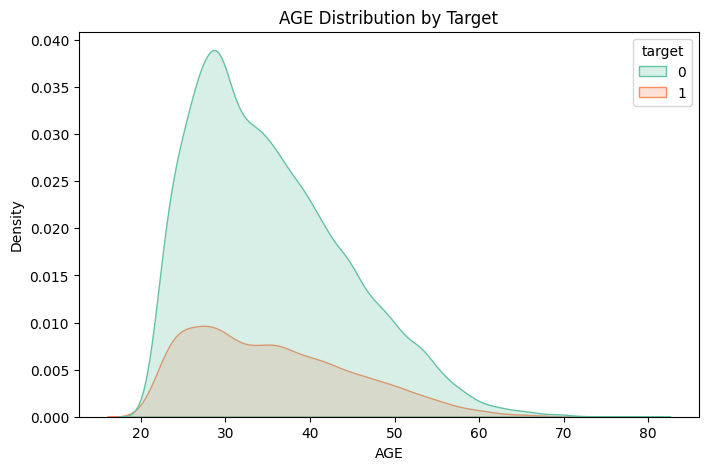

In [22]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='AGE', hue='target', fill=True, palette='Set2')
plt.title("AGE Distribution by Target")
plt.xlabel("AGE")
plt.ylabel("Density")
plt.show()




*   Non-defaulters (target = 0) have a broader age distribution, particularly between ages 25 to 50.







*   Defaulters (target = 1) are fewer across all age ranges, but slightly more concentrated around the 30–40 age group.
*   Interpretation: Younger individuals might be slightly more prone to default, or there may be fewer older defaulters in the dataset.


*   Actionable Use: Age could be a supplementary feature for default prediction but may not be as strong as payment behavior or credit limit.



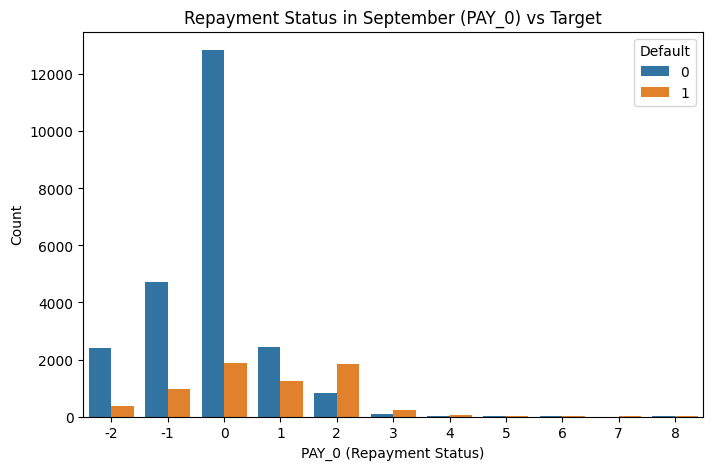

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PAY_0', hue='target', data=df)
plt.title("Repayment Status in September (PAY_0) vs Target")
plt.xlabel("PAY_0 (Repayment Status)")
plt.ylabel("Count")
plt.legend(title="Default")
plt.show()




*   The bar plot shows that the majority of customers have a PAY_0 (September repayment status) of 0, meaning they paid on time, and most of these did not default (blue bars).


*  However, as the repayment status moves to 2 or higher (indicating payments are delayed by 2+ months), the proportion of defaults (orange bars) increases sharply. This suggests that recent repayment behavior is a strong indicator of default risk.



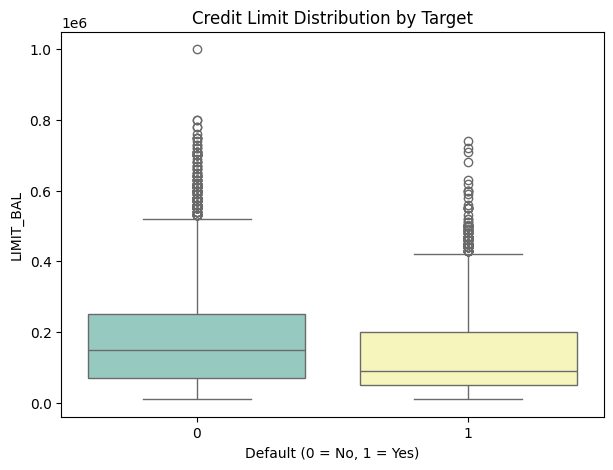

In [24]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='target', y='LIMIT_BAL', hue='target', data=df, palette='Set3', dodge=False)
plt.title("Credit Limit Distribution by Target")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("LIMIT_BAL")
plt.legend().set_visible(False)
plt.show()




*   This boxplot compares the distribution of credit limits (LIMIT_BAL) between those who did not default (0) and those who did default (1).


*   Non-defaulters tend to have higher median credit limits and a broader interquartile range, whereas defaulters cluster toward lower credit limits. This indicates customers with higher available credit are less likely to default, potentially due to better financial standing or bank’s risk assessment practices.



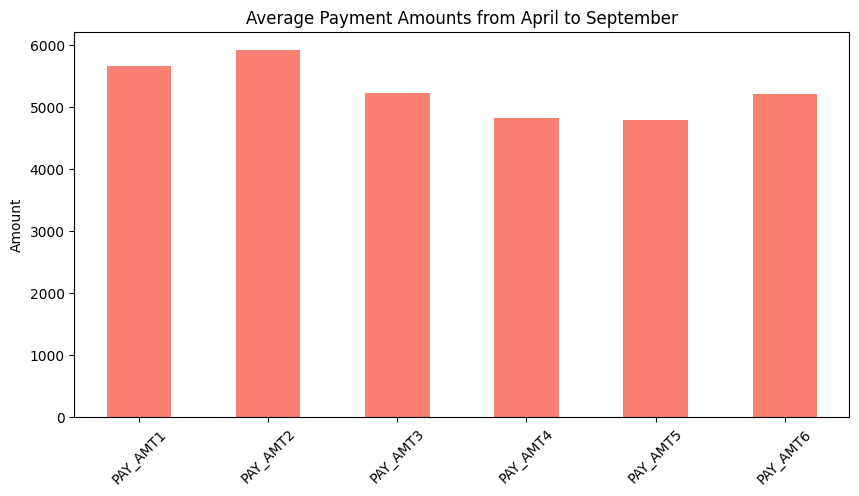

In [25]:
pay_cols = [f"PAY_AMT{i}" for i in range(1, 7)]
df[pay_cols].mean().plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title("Average Payment Amounts from April to September")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()




*   The bar chart of average payment amounts over six months (PAY_AMT1 to PAY_AMT6) shows a slight decreasing trend after the second month, where payments peaked.


*  This indicates that while customers initially make strong repayments, the average payment amount slightly tapers, possibly reflecting reduced ability or willingness to pay as time progresses.



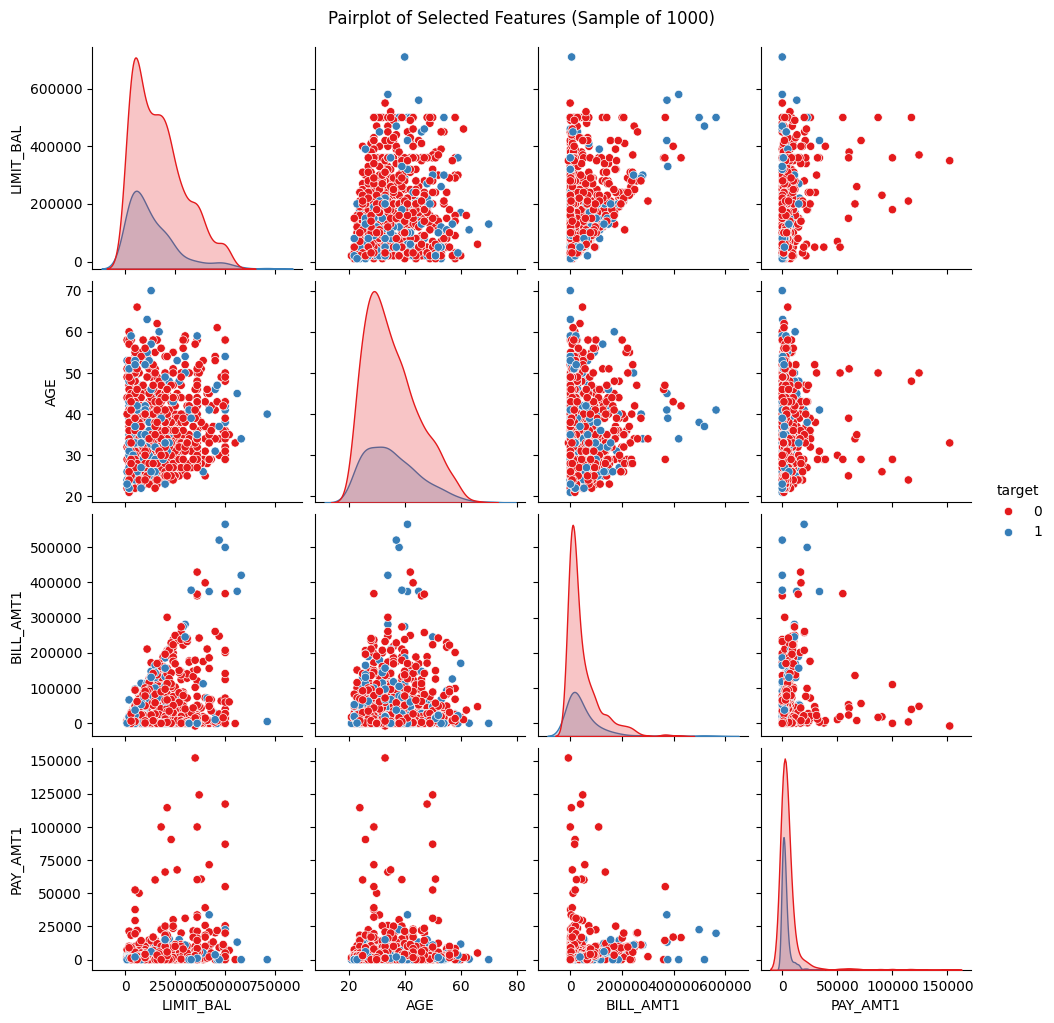

In [26]:
sampled_df = df.sample(1000, random_state=42)
sns.pairplot(sampled_df, vars=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1'], hue='target', palette='Set1')
plt.suptitle("Pairplot of Selected Features (Sample of 1000)", y=1.02)
plt.show()




*  The pairplot explores relationships among LIMIT_BAL, AGE, BILL_AMT1, and PAY_AMT1, colored by default.




*  Defaults (red) are somewhat concentrated among lower credit limits and varying bill/payment amounts, but overlap significantly with non-defaulters. The density plots also show that non-defaulters typically have slightly higher credit limits and somewhat lower bill amounts, though there is considerable spread.

*   AGE does not show strong separation, suggesting that age alone is not a strong predictor, but combined with other features could be meaningful.






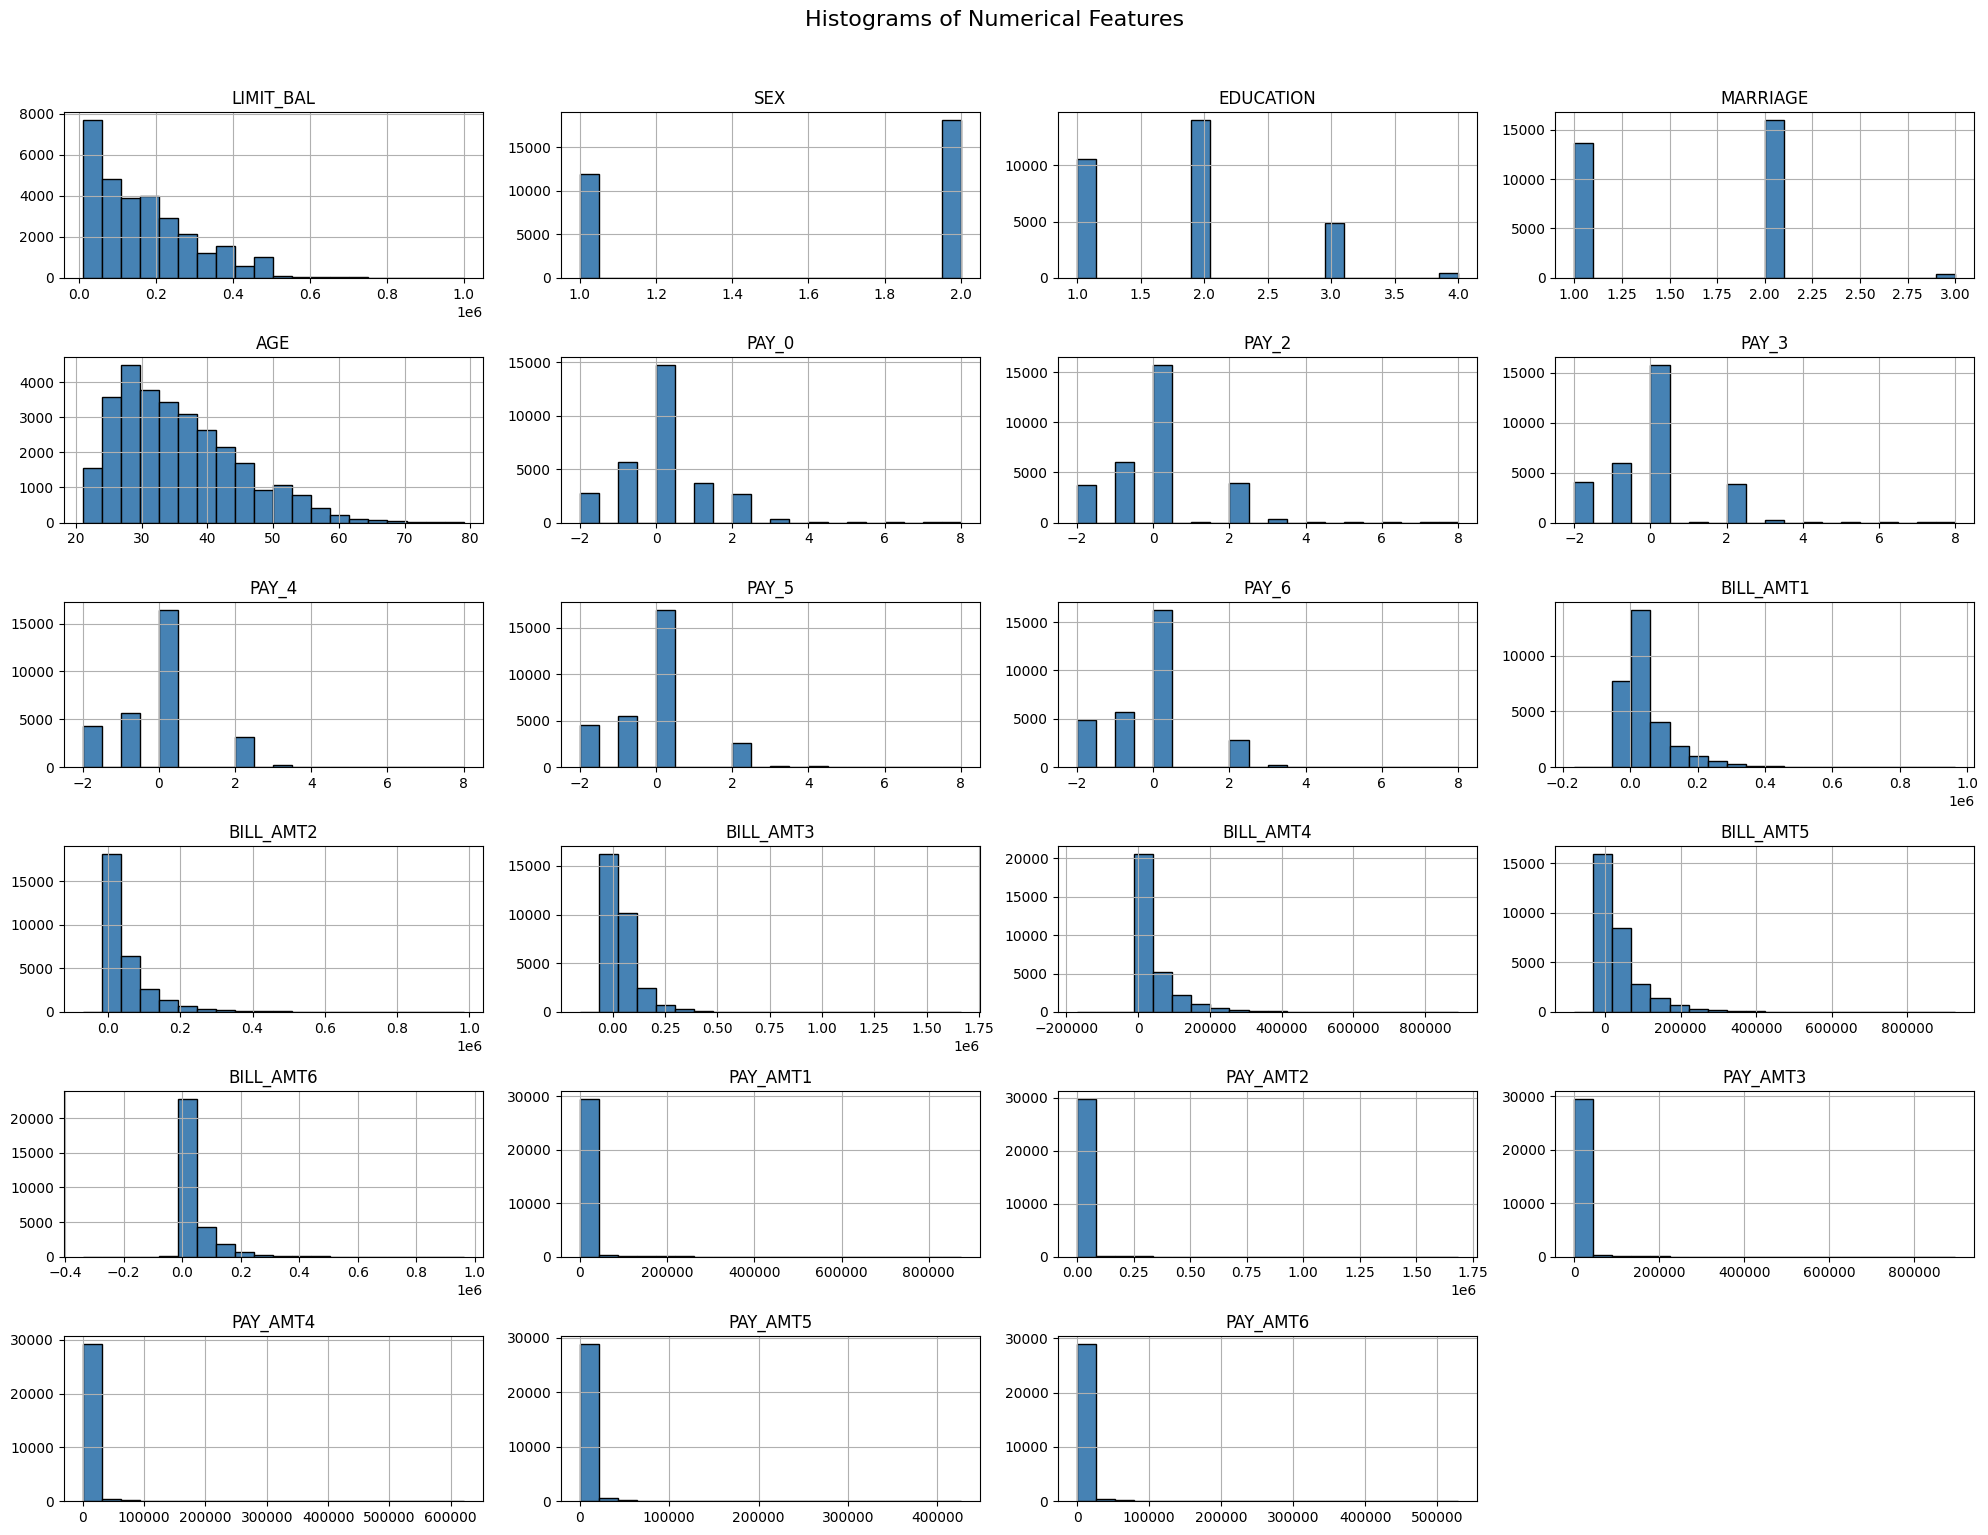

In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove("target")

n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols


df[numerical_cols].hist(
    bins=20, figsize=(20, 15), layout=(n_rows, n_cols), color='steelblue', edgecolor='black'
)

plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### 1. LIMIT_BAL (Credit Limit)

*   Highly right-skewed distribution.
*   Majority of clients have credit limits below ₹100,000.

*   Very few customers have high credit limits (above ₹500,000).
*   Suggests most users are low to mid-risk borrowers in terms of limit assigned.
#### 2. AGE

*   Most clients are aged between 25 and 40 years.
*   Fewer older clients, and hardly any below 20 or above 70.

*   Age could be a valuable feature, as younger clients may have higher default tendencies.

#### 3. PAY_0 to PAY_6 (Repayment Status)

*   Most common values are -1, 0, 1, 2, indicating:

*  :-  -1 = pay duly
*  :-  0 = no delay
*  :- 1, 2 = one/two-month delay


*   Some features (like PAY_0) show more positive delays than others → possibly predictive.
*   Distributions are categorical-like despite being numeric → can be treated as ordinal.

####  4. BILL_AMT1 to BILL_AMT6

*   Strongly right-skewed (long tail).
*   Most clients have bill amounts below ₹100,000.



*   Some bills are as high as ₹1,000,000+ → outliers present.
*   Correlated with LIMIT_BAL.
####  5. PAY_AMT1 to PAY_AMT6 (Payments Made)

*   Extremely right-skewed.
*   Majority of clients pay small amounts or none at all.



*   High spikes at ₹0, meaning many customers missed or made no payments in some months.
*  Some very large payments (₹500,000+) → extreme values, possibly corporate accounts or loan settlements.




















### 4. Preprocessing

<Axes: >

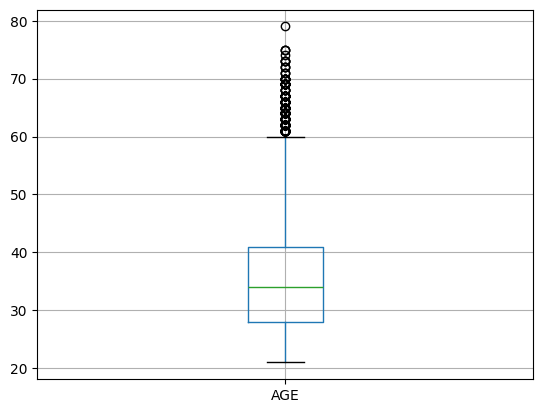

In [28]:
df.boxplot('AGE')

In [29]:
IQR_LIM=df['LIMIT_BAL'].quantile(q=0.75)-df['LIMIT_BAL'].quantile(q=0.25)
IQR_LIM

np.float64(190000.0)

In [30]:
UL_LIM=df['LIMIT_BAL'].quantile(q=0.75)+1.5*IQR_LIM
UL_LIM

np.float64(525000.0)

In [31]:
df['LIMIT_BAL'].quantile(np.arange(0,1,0.02))

,LIMIT_BAL
0.00,10000.0
0.02,20000.0
0.04,20000.0
0.06,20000.0
0.08,20000.0
0.10,30000.0
0.12,30000.0
0.14,40000.0
0.16,50000.0
0.18,50000.0


In [32]:
for i in df['LIMIT_BAL'].index:
    if df['LIMIT_BAL'][i]>UL_LIM:
        df['LIMIT_BAL'][i]=UL_LIM

In [33]:
df['AGE'].describe()

,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [34]:
IQR_AGE=df['AGE'].quantile(q=0.75)-df['AGE'].quantile(q=0.25)
UL_AGE=df['AGE'].quantile(q=0.75)+1.5*IQR_AGE
for i in df['AGE'].index:
    if df['AGE'][i]>UL_AGE:
        df['AGE'][i]=UL_AGE

<Axes: >

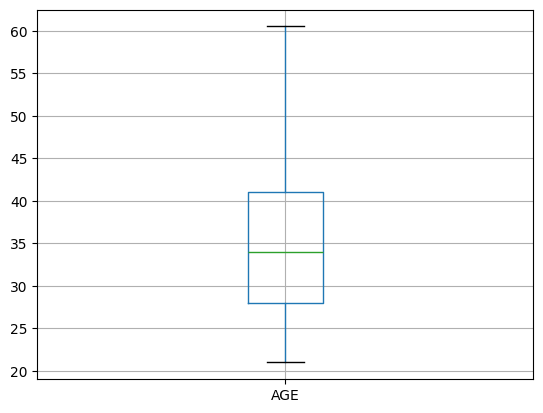

In [35]:
df.boxplot('AGE')

### 5.Feature Engineering

In [36]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_features = [col for col in df.columns if col not in categorical_features + ['target']]

In [37]:
numerical_transformer = StandardScaler()

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='passthrough'
)

###6. Data splitting

In [39]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [41]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}


###7. Model Training

In [42]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

###8. Model Evaluation

In [ ]:
print("Best Params:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy Score: 0.8155

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Confusion Matrix:
 [[4431  242]
 [ 865  462]]
